In [295]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [166]:
df = pd.read_csv("bank-additional-full.csv", delimiter=";")

In [167]:
for column in df.columns:
    df[column].replace('unknown', np.nan, inplace=True)
    df.dropna(inplace=True)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30488 non-null  int64  
 1   job             30488 non-null  object 
 2   marital         30488 non-null  object 
 3   education       30488 non-null  object 
 4   default         30488 non-null  object 
 5   housing         30488 non-null  object 
 6   loan            30488 non-null  object 
 7   contact         30488 non-null  object 
 8   month           30488 non-null  object 
 9   day_of_week     30488 non-null  object 
 10  duration        30488 non-null  int64  
 11  campaign        30488 non-null  int64  
 12  pdays           30488 non-null  int64  
 13  previous        30488 non-null  int64  
 14  poutcome        30488 non-null  object 
 15  emp.var.rate    30488 non-null  float64
 16  cons.price.idx  30488 non-null  float64
 17  cons.conf.idx   30488 non-null 

In [170]:
data.duplicated().sum()

0

In [171]:
data.drop_duplicates(inplace=True)

In [172]:
data.shape

(41176, 21)

In [173]:
X = data.drop(columns=["y"])
y = data["y"]

In [174]:
y = y.apply(lambda x: 0 if x == "no" else 1)

In [175]:
X_features = X.columns

In [176]:
num_features = X.select_dtypes(include=[int, float]).columns
cat_features = X.select_dtypes(include=object).columns

In [177]:
X = pd.get_dummies(X, columns=cat_features)

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=9)

In [181]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [191]:
logistic_regressor = LogisticRegression(penalty="l2", max_iter=1000)

In [192]:
logistic_regressor.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [193]:
y_pred = logistic_regressor.predict(X_test)

In [194]:
accuracy_score(y_test, y_pred)

0.9080385331498422

## Decision Trees

In [255]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=9, shuffle=True)

In [284]:
tree_model = DecisionTreeClassifier(random_state=9, max_depth=5)

In [285]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=9)

In [286]:
y_pred_tree = tree_model.predict(X_test)

In [287]:
accuracy_score(y_test, y_pred_tree)

0.9136242208370436

In [271]:
feature_importance = tree_model.feature_importances_
features = X.columns

best_ = {feature: importance for feature, importance in zip(features, feature_importance)}

In [272]:
sorted_dict = dict(sorted(best_.items(), key=lambda x: x[1], reverse=True)[:10])
top_10_features = [item for item in sorted_dict]
top_10_values = [value for item, value in sorted_dict.items()]

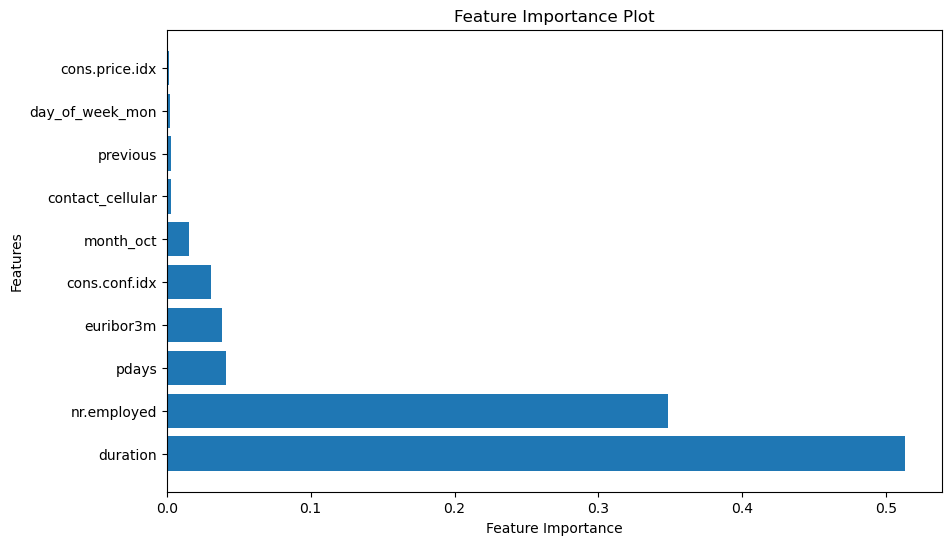

In [273]:
feature_importance = tree_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_values)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

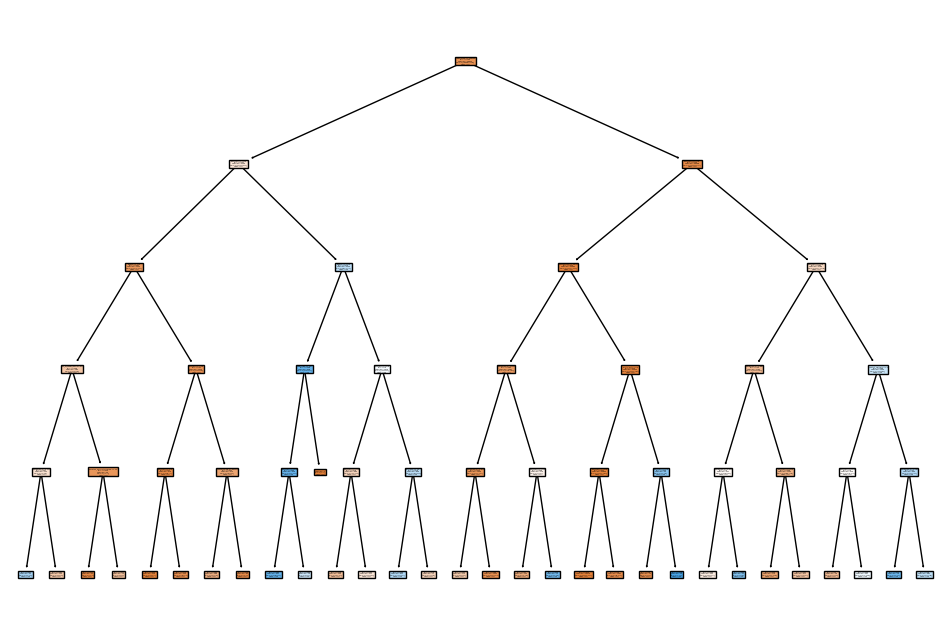

In [275]:
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=X.columns.tolist(), class_names=["No", "Yes"])
plt.show()

## SGD

In [288]:
from sklearn.linear_model import SGDClassifier

In [289]:
sgd_model = SGDClassifier(random_state=9)

In [290]:
sgd_model.fit(X_train, y_train)

SGDClassifier(random_state=9)

In [291]:
y_pred_sgd = sgd_model.predict(X_test)

In [292]:
accuracy_score(y_test, y_pred_sgd)

0.9069052052133085

In [298]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],          # Regularization strength
    'penalty': ['l1', 'l2'],                    # Regularization type
    'max_iter': [1000, 2000, 3000],                # Maximum number of iterations
    'loss': ['hinge', 'log', 'modified_huber'], # Loss function
}

In [299]:
grid_search = GridSearchCV(estimator=sgd_model, param_grid=param_grid, scoring='accuracy', cv=5)

In [300]:
grid_search.fit(X_train, y_train)

/Users/smitmewada/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/smitmewada/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/smitmewada/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/smitmewada/anac

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=9),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log', 'modified_huber'],
                         'max_iter': [1000, 2000, 3000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [302]:
best_params

{'alpha': 0.01, 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'l2'}

In [301]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_